In [18]:
%load_ext autoreload
%autoreload 2

from glycontact.process import *
from glycontact.visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
plot_glycan_3D("Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc", show_volume=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [21]:
ggraph = get_structure_graph(g, stereo='beta')
print(nx.get_node_attributes(ggraph, "string_labels"))
print(nx.get_node_attributes(ggraph, "Q"))
print(nx.get_node_attributes(ggraph, "phi_angle"))

{0: 'Neu5Ac', 1: 'a2-3', 2: 'Gal', 3: 'b1-3', 4: 'Fuc', 5: 'a1-4', 6: 'GlcNAc'}
{0: 0.398, 2: 0.505, 4: 0.458, 6: 0.415}
{1: -57.76, 3: 69.48, 5: 60.53}


In [22]:
g = "Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc"
compute_merge_SASA_flexibility(g,'weighted', stereo='beta')

,Monosaccharide_id,Monosaccharide,SASA,Standard Deviation,Coefficient of Variation,flexibility
0,1,-R,0.451623,0.029496,0.066452,3.515277
1,2,GlcNAc(b1-1),2.372823,0.114658,0.048010,3.279678
2,3,Gal(b1-3),1.237559,0.083590,0.067776,1.721472
3,4,Neu5Ac(a2-3),3.993250,0.246247,0.061469,6.192019
4,5,Fuc(a1-4),1.993078,0.105922,0.054543,4.196895


In [87]:
g = "Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"#"Araf(b1-2)Araf"
res, ints = annotation_pipeline(g, stereo='beta')
res

(    record_name  atom_number atom_name monosaccharide chain_id  \
 0          ATOM            1       HO1            ROH        X   
 1          ATOM            2        O1            ROH        X   
 2          ATOM            3        C1            NGA        X   
 3          ATOM            4        H1            NGA        X   
 4          ATOM            5        C2            NGA        X   
 ..          ...          ...       ...            ...      ...   
 118        ATOM          119       H2M            SIA        X   
 119        ATOM          120       H1M            SIA        X   
 120        ATOM          121       O5N            SIA        X   
 121        ATOM          122        O4            SIA        X   
 122        ATOM          123       H4O            SIA        X   
 
      residue_number       x       y       z  occupancy  temperature_factor  \
 0                 1  26.546  21.344  17.920        1.0                 0.0   
 1                 1  25.758  21.698

In [88]:
get_ring_conformations(res[0])

,residue,monosaccharide,Q,theta,phi,conformation
0,2,NGA,0.453,15.06,"[13.98, 176.86, 360.0]",4C1
1,3,SIA,0.454,10.71,"[166.54, 128.72, 180.0]",2C5
2,4,GAL,0.466,5.08,"[160.71, 91.26, 360.0]",4C1
3,5,SIA,0.337,12.69,"[49.53, 18.96, 180.0]",2C5


In [25]:
g = "Neu5Ac(a2-3)Gal(b1-3)[Fuc(a1-4)]GlcNAc"
g2 = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc"

res = superimpose_glycans(g, g2)
#print(res)

In [26]:
plot_superimposed_glycans(res, animate=False, filepath="C:/Users/Daniel/Downloads/ex_struc.png")

Click the 'Save Image' button above to save the visualization to C:/Users/Daniel/Downloads/ex_struc.png


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# How many files from glycoshape are already compatible with glycontact?

In [2]:
### Download full glycoshape except those already downloaded and present in my glycans path
iupac_list = get_glycoshape_IUPAC()

my_glycans_path = "glycans_pdb/"
my_glycans_list = os.listdir(my_glycans_path)


for g in iupac_list:
    if g not in my_glycans_list and 'diacetimido' in g:
        print(g)
        #download_from_glycoshape(g)

In [36]:
#download took 72m

In [27]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
weird_list = [glycan for glycan in iupac_list if '(' not in glycan or glycan[-1]==']']
print(weird_list)
iupac_list = [glycan for glycan in iupac_list if '(' in glycan and glycan not in weird_list]

print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    if ')' not in g_list[g_index]:
        break
    print(g_list[g_index])
    pdb_path = 'glycans_pdb'
    pdbs = os.listdir(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        print("PDB error")
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df, _ = annotation_pipeline(iupac_list[g_index], pdb_file=pdb_file, threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        print("MONOSAC ERROR")
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df[0]['atom_number'][0])
    except :
        print("CANNOT BUILD!")
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    else : #try with another PDB file if any available
        for pdb_count in range(1,10):
            #print("Retrying " + iupac_list[g_index] + ' with another PDB file...')
            #print('Retry nb ' + str(pdb_count))
            try :
                pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[pdb_count]
                df, _ = annotation_pipeline(iupac_list[g_index], pdb_file=pdb_file, threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
                print(df['atom_number'][0])
                errors = 'SUCCESS'
                break
            except :
                df = pd.DataFrame()
                print("Retry failed...")
 
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

['Man', 'GlcNAc(b1-2)[Glc(a1-3)]Rha(a1-2)Rha(a1-3)Rha[2A]', 'Xyl', 'Fuc', 'GlcNAc', 'Araf', 'Glc']
630
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)GalNAc
1
GlcNAc(a1-4)GlcA(b1-4)GlcNAc
1
Man(a1-3)Man(a1-3)Man(a1-3)Man(a1-3)GlcNAc
1
GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA(a1-4)Gal
1
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
1
Gal(a1-3)Gal(b1-3)GalNAc
CANNOT BUILD!
Retry failed...
Retry failed...
Retry failed...
Retry failed...
Retry failed...
Retry failed...
Retry failed...
Retry failed...
Retry failed...
Araf(b1-2)Araf(b1-3)Araf(b1-2)Araf(b1-2)Araf
1
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc(a1-4)GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNAc(a1-4)GlcA
1
Man(a1-3)Man(a1-3)Man(a1-2)Man(a1-2)Man
1
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
1
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
1
Gal(b1-4)GlcNAc(b1-2)Man
1
Ga

In [28]:
success_df = fdf[fdf['success']=='SUCCESS']
success_df #178 -> 274 --> 314 --> 364 --> 364 --> 380 --> (Oct17) 571 --> (Jan 31) 576 --> 590 (Feb 9) --> 595 (Feb 18) --> 607 (Feb 22)

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)GalNAc,SUCCESS
1,GlcNAc(a1-4)GlcA(b1-4)GlcNAc,SUCCESS
2,Man(a1-3)Man(a1-3)Man(a1-3)Man(a1-3)GlcNAc,SUCCESS
3,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA(a1-4)Gal,SUCCESS
4,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Glc...,SUCCESS
...,...,...
625,Man(a1-2)[Glc(b1-3)]Man(b1-3)Man(b1-3)Rha(a1-3...,SUCCESS
626,GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS,SUCCESS
627,GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(...,SUCCESS
628,GalA(a1-4)GlcA(b1-4)Glc,SUCCESS


In [30]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']
unsuccess_df #256 --> 171 --> 131 --> 81 --> 70 --> 73 --> (Oct17) 18

,glycan,success
5,Gal(a1-3)Gal(b1-3)GalNAc,__CannotBuild
12,Gal(b1-3)GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Ga...,pdb_UnexpectedMonosaccharide_CannotBuild
39,Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)...,_UnexpectedMonosaccharide_CannotBuild
67,Rha2Me3Me(a1-2)D-Ara(b1-3)Rha(b1-4)Xyl(b1-4)[M...,__CannotBuild
91,IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a...,_UnexpectedMonosaccharide_CannotBuild
197,Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1...,pdb__CannotBuild
213,Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc...,__CannotBuild
230,GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcN...,__CannotBuild
241,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,pdb__CannotBuild
247,Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)GalNAc(b1-4)[...,__CannotBuild


In [31]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

Gal(a1-3)Gal(b1-3)GalNAc
Rha2Me3Me(a1-2)D-Ara(b1-3)Rha(b1-4)Xyl(b1-4)[Man(a1-3)D-Rha(a1-3)][Gal(a1-2)]Fuc(a1-3)[Xyl(b1-4)]Glc
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA
Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)GalNAc(b1-4)[Neu5Ac(a2-8)Neu5Ac(a2-3)]Gal(b1-4)Glc
Man(a1-3)Man
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)[GlcNAc(b1-3)]Gal(b1-4)Glc


In [32]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22 --> 6 --> 8 --> 13

,glycan,success
39,Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)...,_UnexpectedMonosaccharide_CannotBuild
91,IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a...,_UnexpectedMonosaccharide_CannotBuild
325,Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Ma...,_UnexpectedMonosaccharide_CannotBuild
334,Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Ma...,_UnexpectedMonosaccharide_CannotBuild
352,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,_UnexpectedMonosaccharide_CannotBuild
406,GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S...,_UnexpectedMonosaccharide_CannotBuild
573,Glc(a1-3)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...,_UnexpectedMonosaccharide_CannotBuild
584,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal...,_UnexpectedMonosaccharide_CannotBuild


In [33]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)Gal(a1-6)]Man
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
Glc(a1-3)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-2)Man(a1-3)Man(a1-6)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc


In [34]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7 --> 1 --> 2(no PDB on glycoshape) --> 7

,glycan,success
197,Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1...,pdb__CannotBuild
241,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...,pdb__CannotBuild
285,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcN...,pdb__CannotBuild
394,Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,pdb__CannotBuild
460,Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)[Neu5Ac(a2-6)Gal...,pdb__CannotBuild


In [35]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-6)[GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc
Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions but with different linkage types

In [36]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('(a2-9)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [37]:
success_df.sort_values(by ='topological_group')

,glycan,success,nullified,topological_group
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)GalNAc,SUCCESS,SiaHexHexNAcGalNAc,0
111,Neu5Ac(a2-3)Gal(b1-3)GlcNAc(b1-3)GalNAc,SUCCESS,SiaHexHexNAcGalNAc,0
178,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)GalNAc,SUCCESS,SiaHexHexNAcGalNAc,0
1,GlcNAc(a1-4)GlcA(b1-4)GlcNAc,SUCCESS,HexNAcGlcAHexNAc,1
2,Man(a1-3)Man(a1-3)Man(a1-3)Man(a1-3)GlcNAc,SUCCESS,HexHexHexHexHexNAc,2
...,...,...,...,...
625,Man(a1-2)[Glc(b1-3)]Man(b1-3)Man(b1-3)Rha(a1-3...,SUCCESS,Hex[Hex]HexHexRhaGlc,471
626,GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS,SUCCESS,GlcAGlcNSGlcA2SGlcNS,472
627,GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(...,SUCCESS,HexNAcHex[Hex[Hex]Hex][HexNAc]HexHexNAc[Fuc]He...,473
628,GalA(a1-4)GlcA(b1-4)Glc,SUCCESS,GalAGlcAGlc,474


In [38]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

[(52, 6), (14, 5), (26, 5), (69, 5), (73, 5), (97, 5), (142, 5), (168, 5), (99, 4), (110, 4), (146, 4), (0, 3), (7, 3), (24, 3), (31, 3), (37, 3), (41, 3), (49, 3), (59, 3), (70, 3), (87, 3), (94, 3), (98, 3), (116, 3), (147, 3), (158, 3), (242, 3), (281, 3), (316, 3), (4, 2), (5, 2), (13, 2), (15, 2), (21, 2), (27, 2), (28, 2), (29, 2), (36, 2), (56, 2), (57, 2), (64, 2), (65, 2), (74, 2), (75, 2), (76, 2), (79, 2), (82, 2), (84, 2), (88, 2), (92, 2), (122, 2), (131, 2), (145, 2), (152, 2), (162, 2), (165, 2), (167, 2), (171, 2), (173, 2), (174, 2), (175, 2), (185, 2), (194, 2), (205, 2), (210, 2), (211, 2), (234, 2), (236, 2), (238, 2), (244, 2), (249, 2), (284, 2), (300, 2), (302, 2), (307, 2), (314, 2), (342, 2), (361, 2), (376, 2), (386, 2), (398, 2), (410, 2), (1, 1), (2, 1), (3, 1), (6, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (22, 1), (23, 1), (25, 1), (30, 1), (32, 1), (33, 1), (34, 1), (35, 1), (38, 1), (39, 1), (40, 1), (42,

In [39]:
success_df['glycan'][success_df['topological_group']==106].to_list()

['Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

## silhouette v2 = same shape no matter which sugar occupy which place, just the branching pattern is similar 

In [40]:
sil = group_by_silhouette(success_df['glycan'].to_list())
print(sil)
#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(sil['topological_group'].to_list())
print(c.most_common())


                                                glycan             silhouette  \
0              Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)GalNAc                   XXXX   
472                  Fuc(a1-2)Gal(a1-3)Gal(b1-3)GalNAc                   XXXX   
467             GlcA(b1-4)GlcNS(a1-4)IdoA(a1-4)GlcNS6S                   XXXX   
304                 Araf(a1-3)Araf(b1-2)Araf(b1-2)Araf                   XXXX   
463                  Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc                   XXXX   
..                                                 ...                    ...   
563  Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Ma...   XX[XX]X[X[X]X][X]XXX   
566  Neu5Ac(a2-3)[GalNAc(b1-4)]Gal(b1-4)GlcNAc(b1-6...         X[X]XX[X[X]X]X   
596  Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc...  XXX[XX[XX]X][X]XX[X]X   
598  Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(...             XXXXXX[X]X   
604  GlcNAc(b1-2)Man(a1-3)[Man(a1-3)[Man(a1-6)]Man(...     XX[X[X]X][X]XX[X]X   

     topological_group  
0 

In [41]:
success_df['glycan'][success_df['topological_group']==21].to_list()

['Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc',
 'Fuc(a1-4)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc']

In [42]:
g_with_major, g_without_major = glycan_cluster_pattern(threshold = 50) 
print("Glycans with one major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_with_major :
        print(g + ' ' + str(get_all_clusters_frequency()[g]))

print("\nGlycans without a major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_without_major :
        print(g + ' ' + str(get_all_clusters_frequency()[g]))

Number of glycans with one major cluster: 152
Number of glycans without a major cluster: 485
Glycans with one major cluster:


Glycans without a major cluster:

Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc [25.3, 22.7, 18.1, 15.43, 13.04, 5.42]
Fuc(a1-4)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc [42.07, 26.22, 22.29, 9.43]


# Building distance tables and other metrics per glycan groups

In [43]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
g = "Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"
# read all structures and get contact maps
dfs, int_tabs = annotation_pipeline(g, stereo="alpha", threshold=3.5)
atom_dfs = [make_atom_contact_table(df,mode='inclusive', threshold = 200) for df in dfs]
dfs = [make_monosaccharide_contact_table(df,mode='distance', threshold = 200) for df in dfs]

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(g, "alpha", mode='amplify')
isvt = inter_structure_variability_table(g, "alpha")

#atom_isvt_amplified = inter_structure_variability_table(atom_dfs, g, link_type="alpha", mode='amplify')
#atom_isvt = inter_structure_variability_table(atom_dfs)

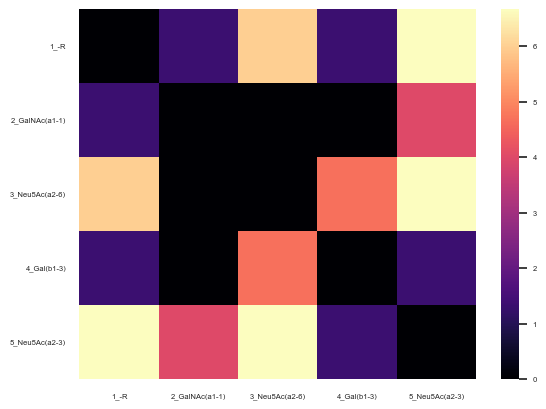

In [44]:
draw_contact_map(isvt)

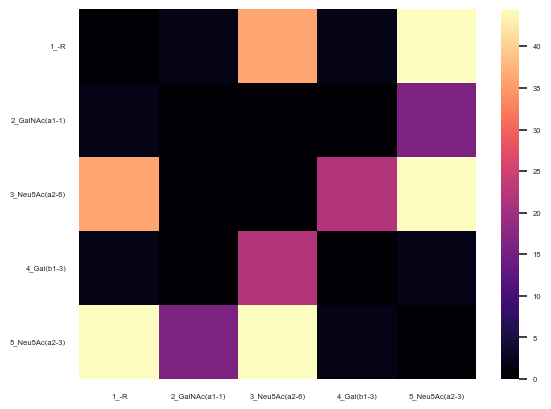

In [45]:
draw_contact_map(isvt_amplified)

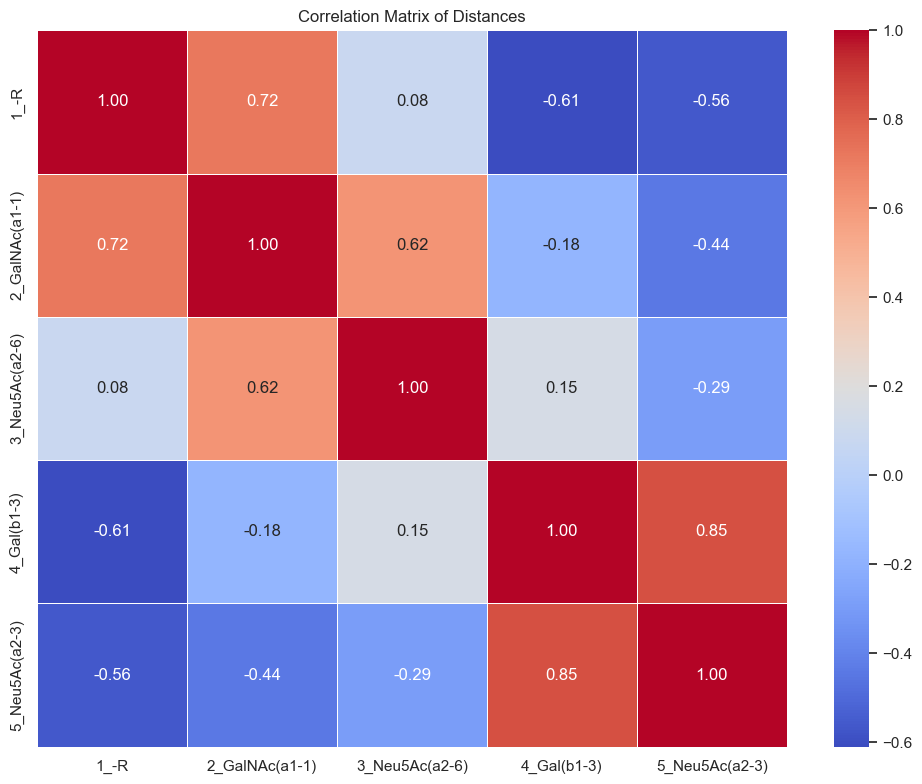

In [46]:
mx = make_correlation_matrix(g, "alpha")
show_correlations(mx)

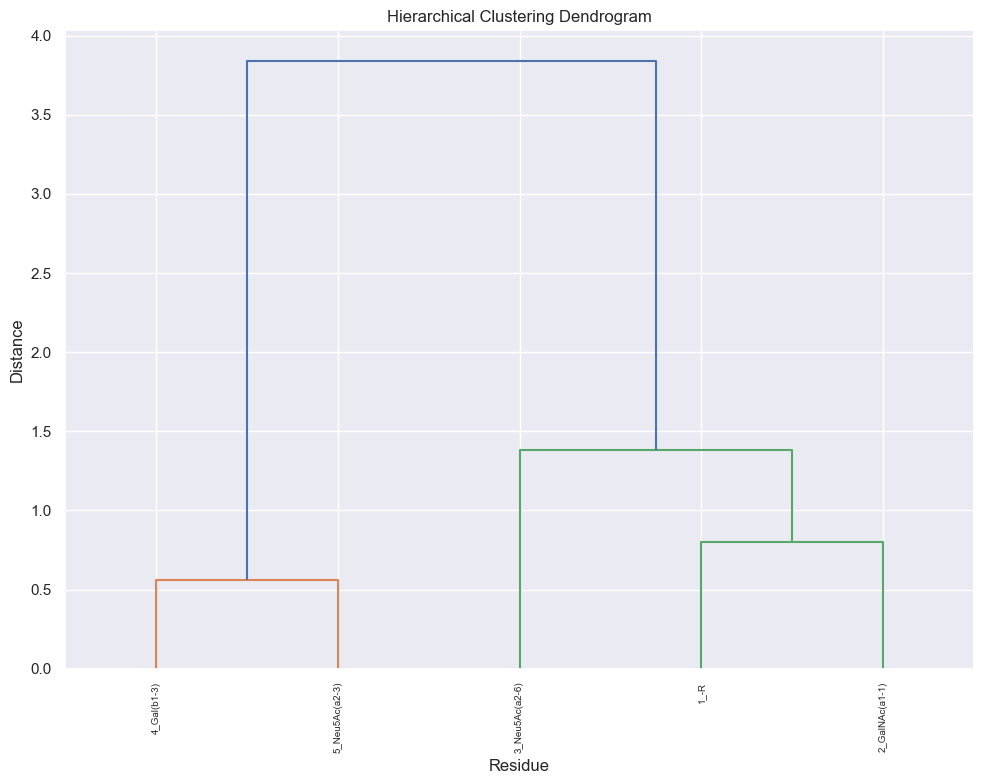

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(a1-1)']}

In [47]:
show_correlation_dendrogram(mx, font_size = 7)

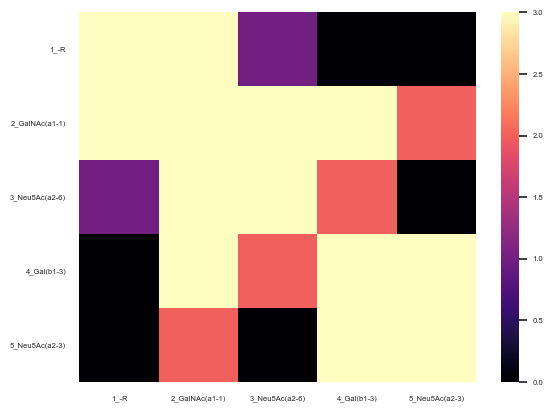

In [48]:
isft = inter_structure_frequency_table(g, "alpha")
draw_contact_map(isft)

In [49]:
#beta

# read all structures and get contact maps
dfs, int_tabs = annotation_pipeline(g, stereo="beta", threshold=3.5)
atom_dfs = [make_atom_contact_table(df,mode='inclusive', threshold = 200) for df in dfs]
dfs = [make_monosaccharide_contact_table(df,mode='distance', threshold = 200) for df in dfs]

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table(g, "beta", mode='amplify')
isvt = inter_structure_variability_table(g, "beta")

#atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
#atom_isvt = inter_structure_variability_table(atom_dfs)

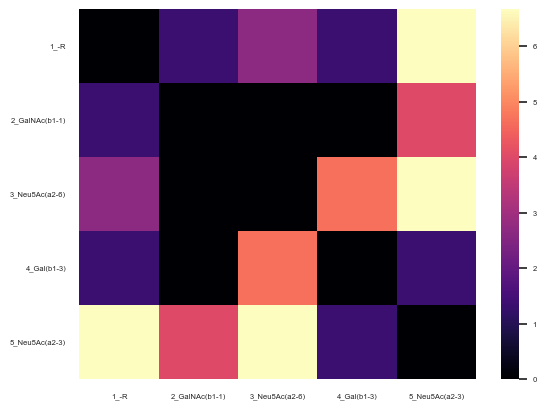

In [50]:
draw_contact_map(isvt)

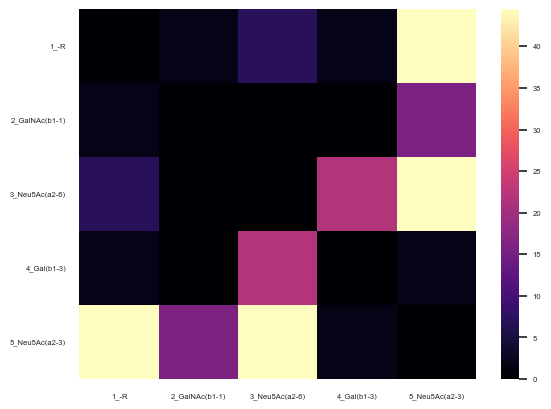

In [51]:
draw_contact_map(isvt_amplified)

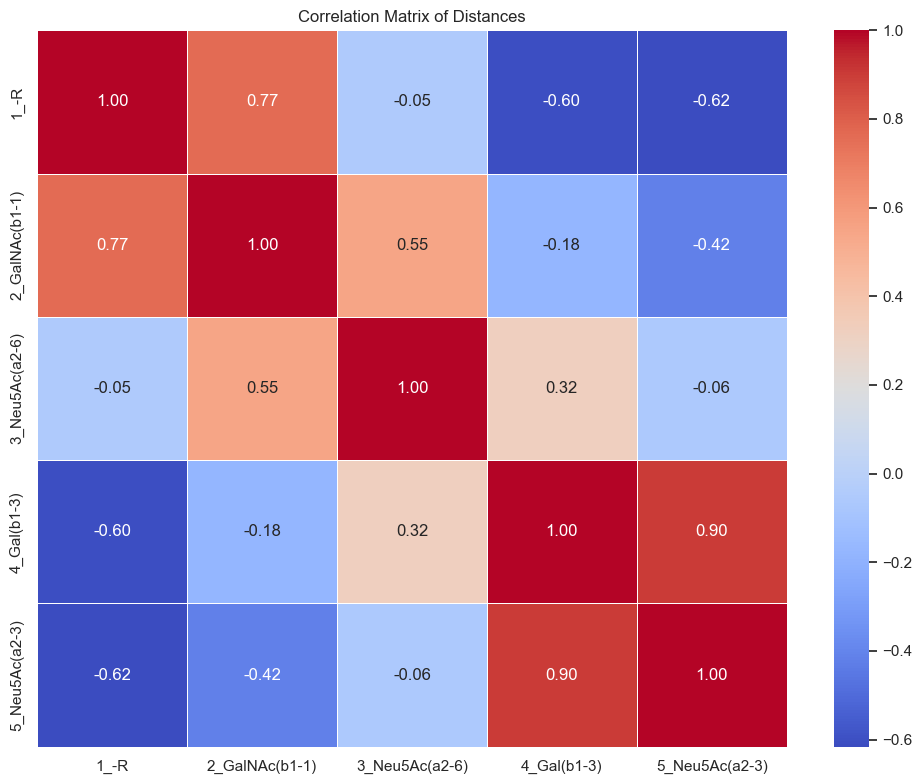

In [53]:
mx = make_correlation_matrix(g, "beta")
show_correlations(mx)

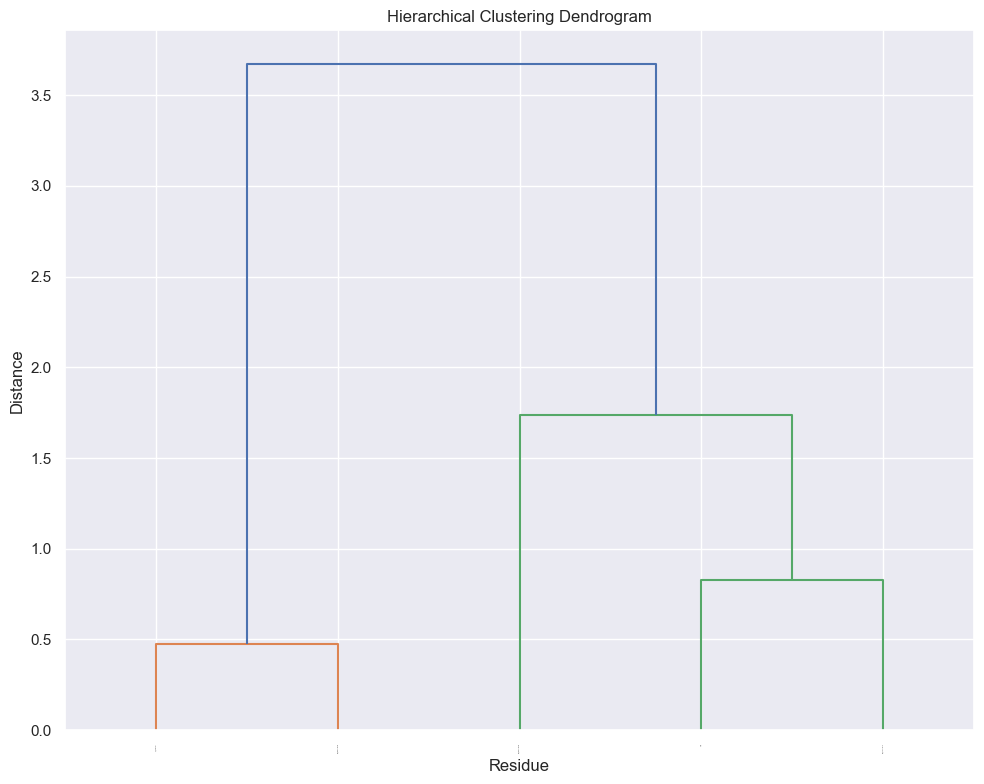

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}

In [54]:
show_correlation_dendrogram(mx)

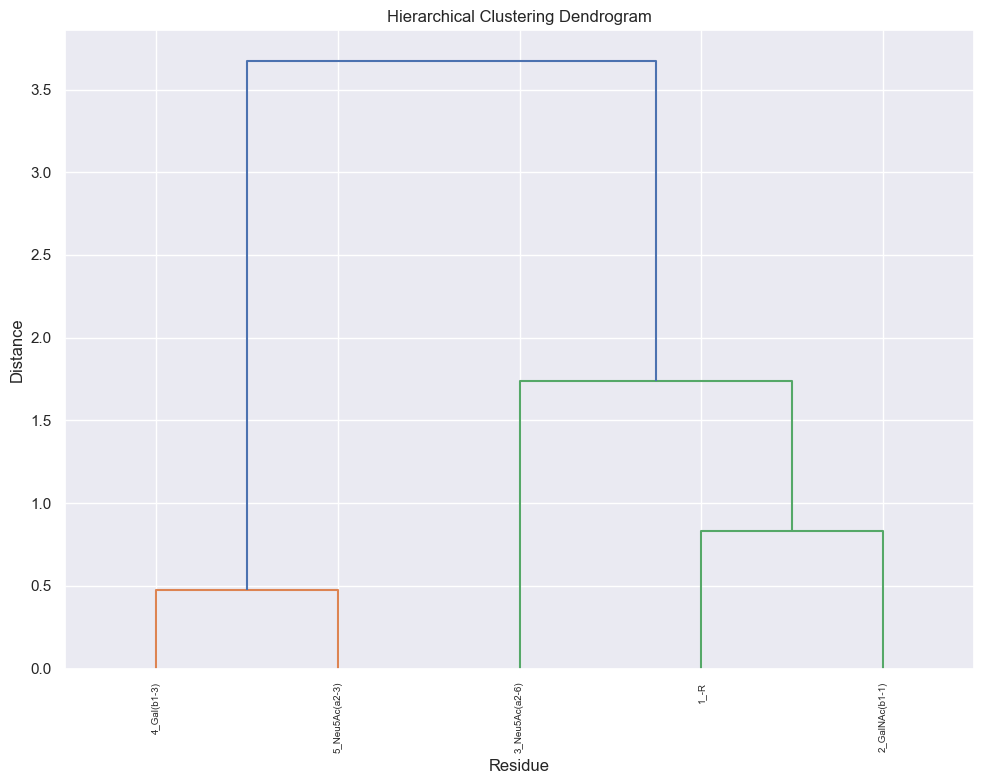

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}

In [55]:
show_correlation_dendrogram(mx, font_size = 7)

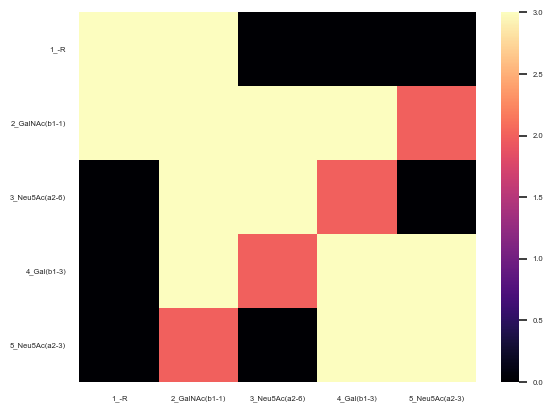

In [56]:
isft = inter_structure_frequency_table(g, "beta")
draw_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Try a pipeline using a2-3 and a2-6 Neu5Ac()

In [57]:
success_list = success_df['glycan'].to_list()
to_process_list = []
for g in success_list :
    if 'a2-3' in g and 'a2-6' in g : 
        to_process_list.append(g)

print(to_process_list)

['Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc', 'Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)[Neu5Ac(a2-8)Neu5Ac(a2-3)]Gal(b1-4)Glc', 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)[Neu5Ac(a2-8)Neu5Ac(a2-3)]Gal(b1-4)Glc', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-8)Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)]Gal(b1-4)Glc']


In [58]:
#manual to_process_list
to_process_list = ['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

In [62]:
g = to_process_list[10]
#g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'

# read all structures and get contact maps
dfs, int_tabs = annotation_pipeline(g, stereo="beta", threshold=3.5)
dfs = [make_monosaccharide_contact_table(df,mode='distance', threshold = 200) for df in dfs if len(df) > 0]


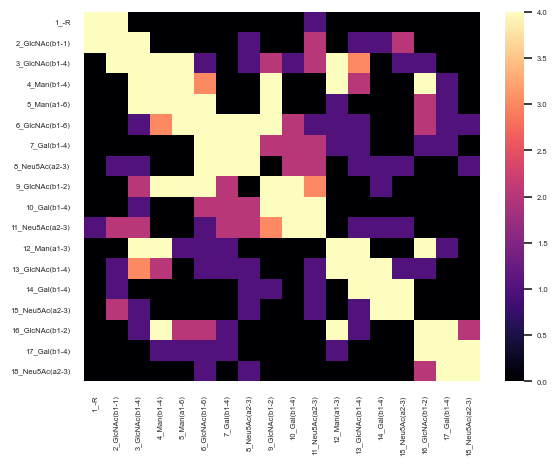

In [63]:
isft = inter_structure_frequency_table(dfs, "beta", threshold = 7)
draw_contact_map(isft)

In [64]:
isft

,1_-R,2_GlcNAc(b1-1),3_GlcNAc(b1-4),4_Man(b1-4),5_Man(a1-6),6_GlcNAc(b1-6),7_Gal(b1-4),8_Neu5Ac(a2-3),9_GlcNAc(b1-2),10_Gal(b1-4),11_Neu5Ac(a2-3),12_Man(a1-3),13_GlcNAc(b1-4),14_Gal(b1-4),15_Neu5Ac(a2-3),16_GlcNAc(b1-2),17_Gal(b1-4),18_Neu5Ac(a2-3)
1_-R,4,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2_GlcNAc(b1-1),4,4,4,0,0,0,0,1,0,0,2,0,1,1,2,0,0,0
3_GlcNAc(b1-4),0,4,4,4,4,1,0,1,2,1,2,4,3,0,1,1,0,0
4_Man(b1-4),0,0,4,4,4,3,0,0,4,0,0,4,2,0,0,4,1,0
5_Man(a1-6),0,0,4,4,4,4,0,0,4,0,0,1,0,0,0,2,1,0
6_GlcNAc(b1-6),0,0,1,3,4,4,4,4,4,2,1,1,1,0,0,2,1,1
7_Gal(b1-4),0,0,0,0,0,4,4,4,2,2,2,1,1,0,0,1,1,0
8_Neu5Ac(a2-3),0,1,1,0,0,4,4,4,0,2,2,0,1,1,1,0,0,1
9_GlcNAc(b1-2),0,0,2,4,4,4,2,0,4,4,3,0,0,1,0,0,0,0
10_Gal(b1-4),0,0,1,0,0,2,2,2,4,4,4,0,0,0,0,0,0,0


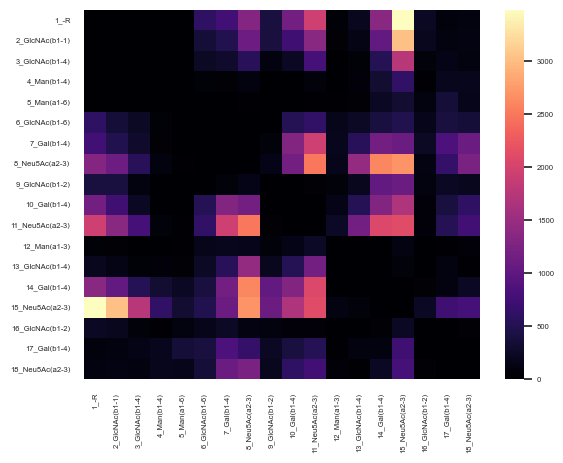

In [65]:
isvt = inter_structure_variability_table(dfs, "beta", mode = 'amplify')
draw_contact_map(isvt)

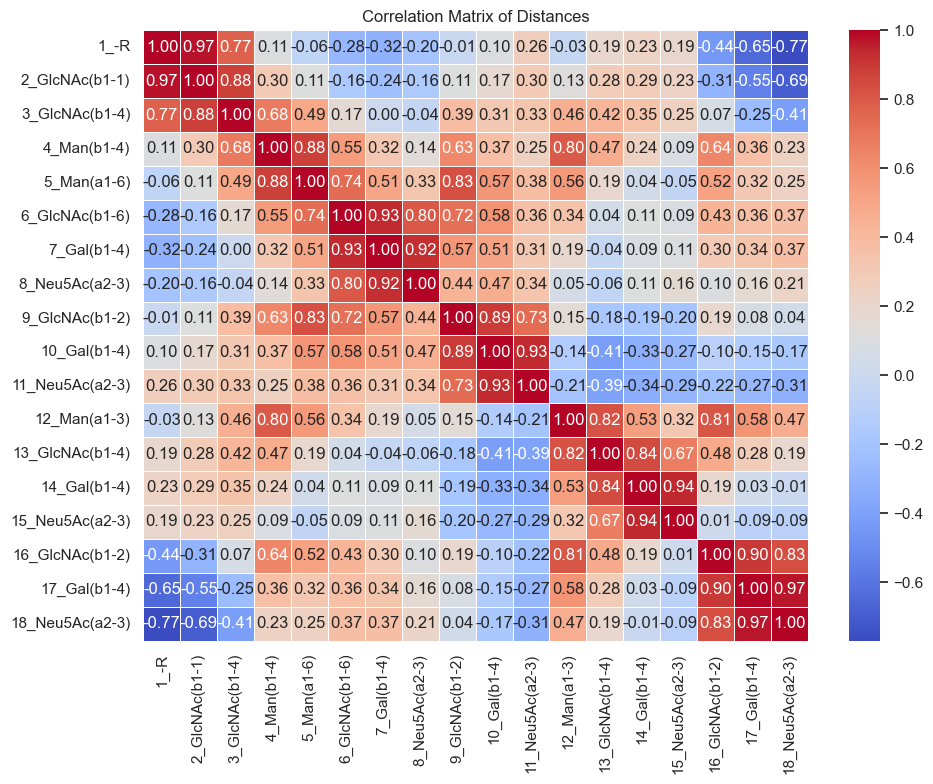

In [66]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

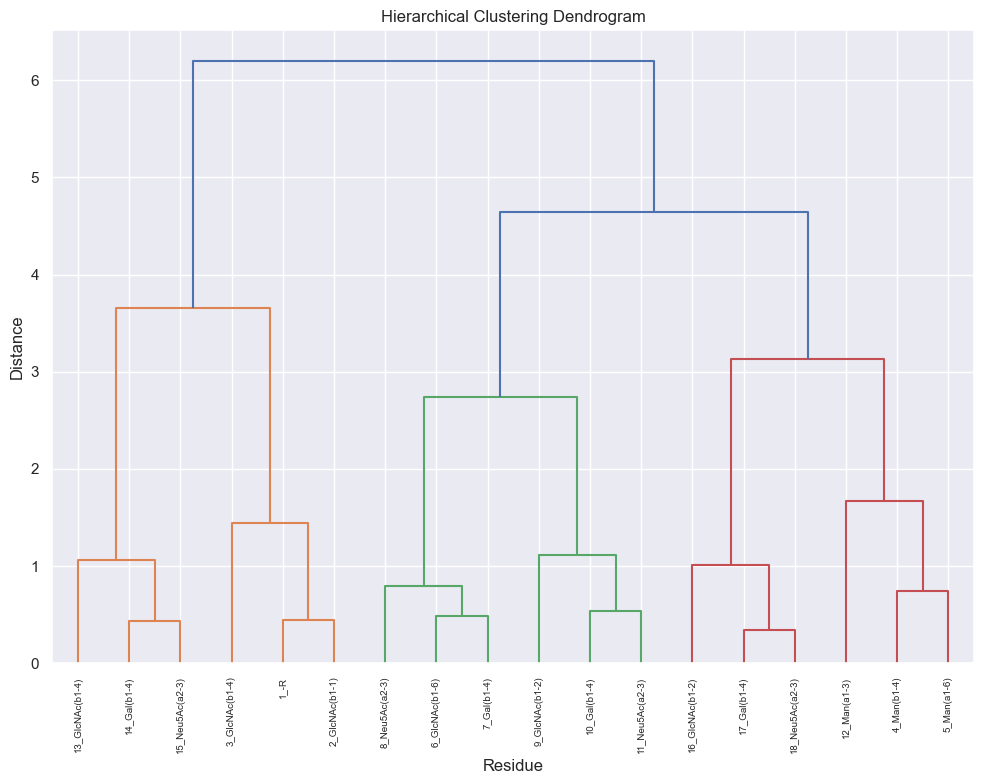

{'C1': ['13_GlcNAc(b1-4)',
  '14_Gal(b1-4)',
  '15_Neu5Ac(a2-3)',
  '3_GlcNAc(b1-4)',
  '1_-R',
  '2_GlcNAc(b1-1)'],
 'C2': ['8_Neu5Ac(a2-3)',
  '6_GlcNAc(b1-6)',
  '7_Gal(b1-4)',
  '9_GlcNAc(b1-2)',
  '10_Gal(b1-4)',
  '11_Neu5Ac(a2-3)'],
 'C3': ['16_GlcNAc(b1-2)',
  '17_Gal(b1-4)',
  '18_Neu5Ac(a2-3)',
  '12_Man(a1-3)',
  '4_Man(b1-4)',
  '5_Man(a1-6)']}

In [67]:
show_correlation_dendrogram(mx, font_size = 7)

In [68]:
residue_overall_stability = {}
for c in isvt.columns.to_list():
    residue_overall_stability[c] = sum(isvt[c].to_list())

sorted_residue_overall_stability = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability)

[('5_Man(a1-6)', 1311.5), ('12_Man(a1-3)', 1322.0), ('16_GlcNAc(b1-2)', 1677.75), ('4_Man(b1-4)', 1681.5), ('9_GlcNAc(b1-2)', 4082.25), ('6_GlcNAc(b1-6)', 4633.0), ('13_GlcNAc(b1-4)', 4794.25), ('3_GlcNAc(b1-4)', 4879.5), ('17_Gal(b1-4)', 4883.0), ('18_Neu5Ac(a2-3)', 6022.5), ('2_GlcNAc(b1-1)', 9108.0), ('10_Gal(b1-4)', 9832.75), ('7_Gal(b1-4)', 10032.0), ('1_-R', 11703.5), ('14_Gal(b1-4)', 12390.5), ('8_Neu5Ac(a2-3)', 15850.0), ('11_Neu5Ac(a2-3)', 16241.75), ('15_Neu5Ac(a2-3)', 20304.75)]


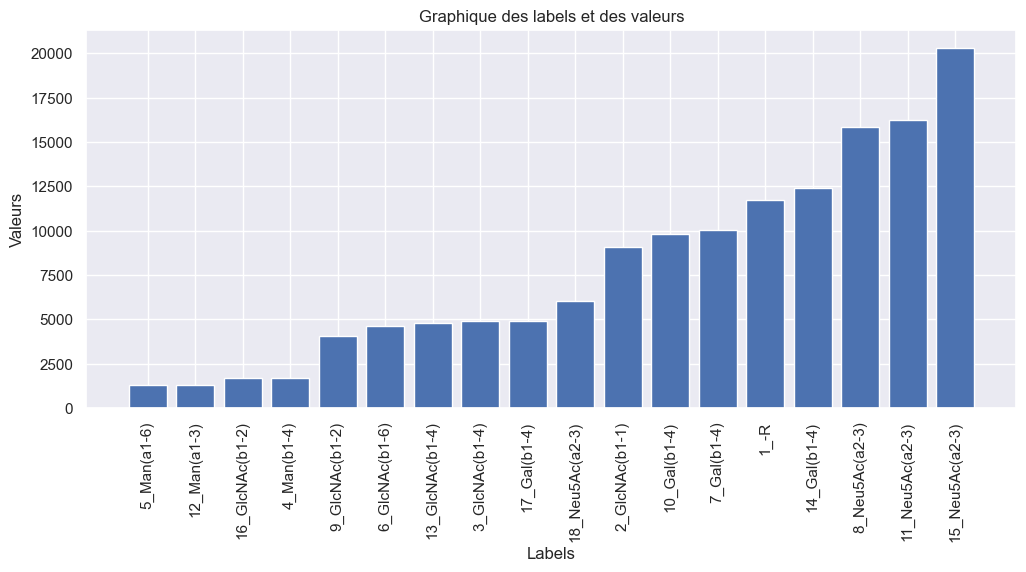

In [69]:
### BETA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
#fig.savefig(g+'monosaccharide_instabilities.png')

# Save the plot as PDF
#fig.savefig(g+'monosaccharide_instabilities.pdf')

plt.show()

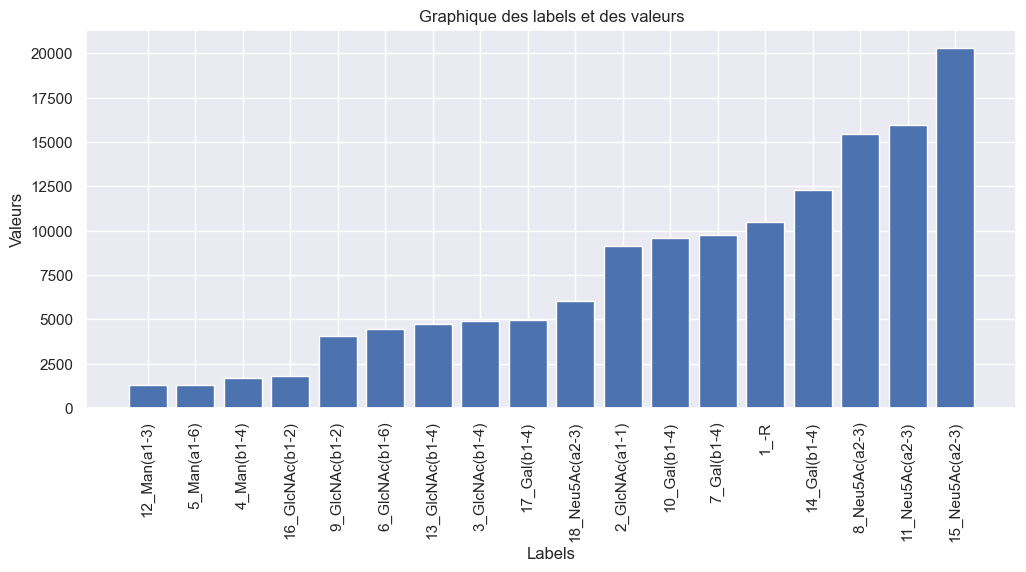

In [83]:
### ALPHA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
#fig.savefig(g+'alpha_monosaccharide_instabilities.png')

# Save the plot as PDF
#fig.savefig(g+'alpha_monosaccharide_instabilities.pdf')

plt.show()

In [70]:
glycan = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
res = get_sasa_table(glycan)
res

,Monosaccharide_id,Monosaccharide,SASA,Standard Deviation,Coefficient of Variation
0,1,-R,0.423589,0.096381,0.255827
1,2,GlcNAc(b1-1),2.787262,0.471142,0.190065
2,3,GlcNAc(b1-4),2.284654,0.474065,0.246059
3,4,Man(b1-4),0.897422,0.053907,0.061997
4,5,Man(a1-6),1.210701,0.218040,0.193056
5,6,GlcNAc(b1-6),1.729296,0.456892,0.265018
6,7,Gal(b1-4),1.344917,0.242864,0.194128
7,8,Neu5Ac(a2-3),3.180557,0.595990,0.183496
8,9,GlcNAc(b1-2),1.896549,0.241319,0.135304
9,10,Gal(b1-4),1.618439,0.336508,0.246533


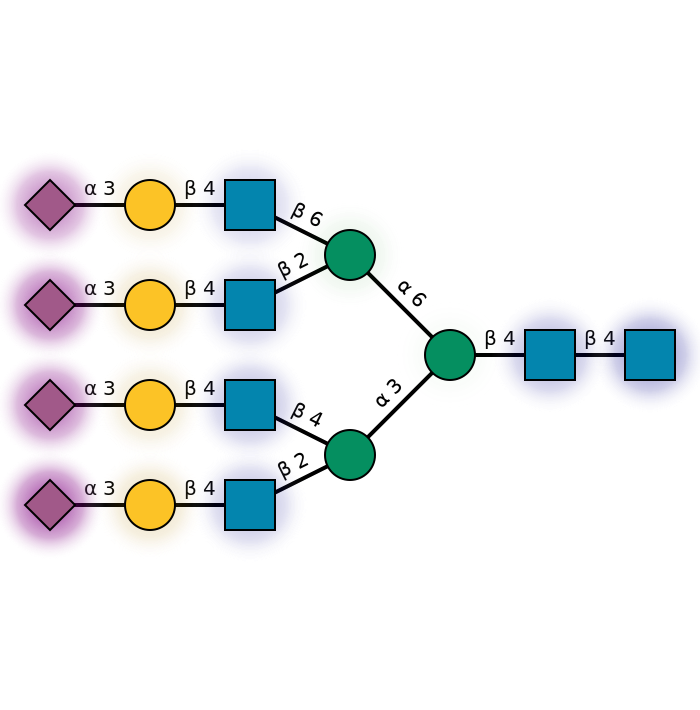

In [72]:
plot_glycan_score(glycan, attribute="SASA")

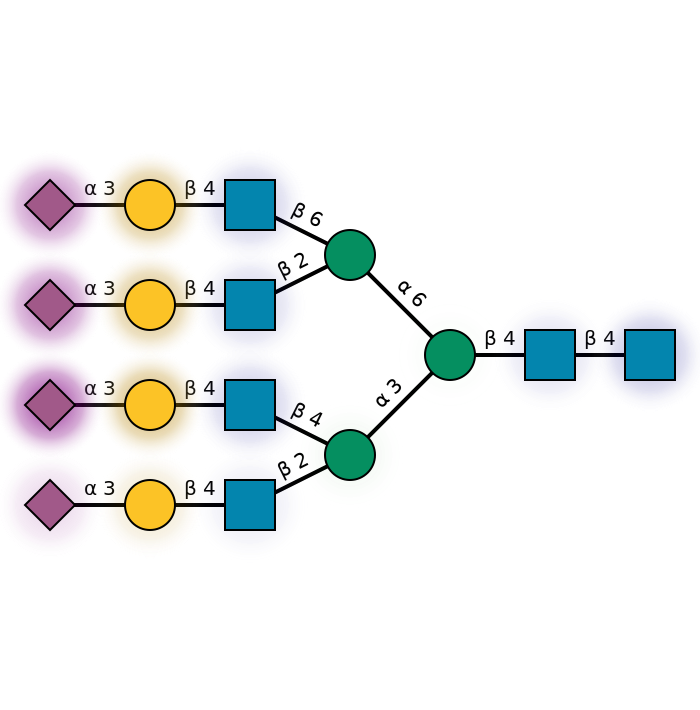

In [73]:
plot_glycan_score(glycan, attribute="flexibility")

# Get cluster frequencies + Analysis

In [74]:

glycan_cluster_pattern()

Number of glycans with one major cluster: 35
Number of glycans without a major cluster: 602


(['Man3Me(a1-3)[Man3Me(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'IdoA2S(a1-4)GlcNS6S',
  'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Glc',
  'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)][Fuc(a1-6)]GlcNAc',
  'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc',
  'Gal(b1-4)Glc',
  'GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  'Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  'Fuc',
  'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc',
  'Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)

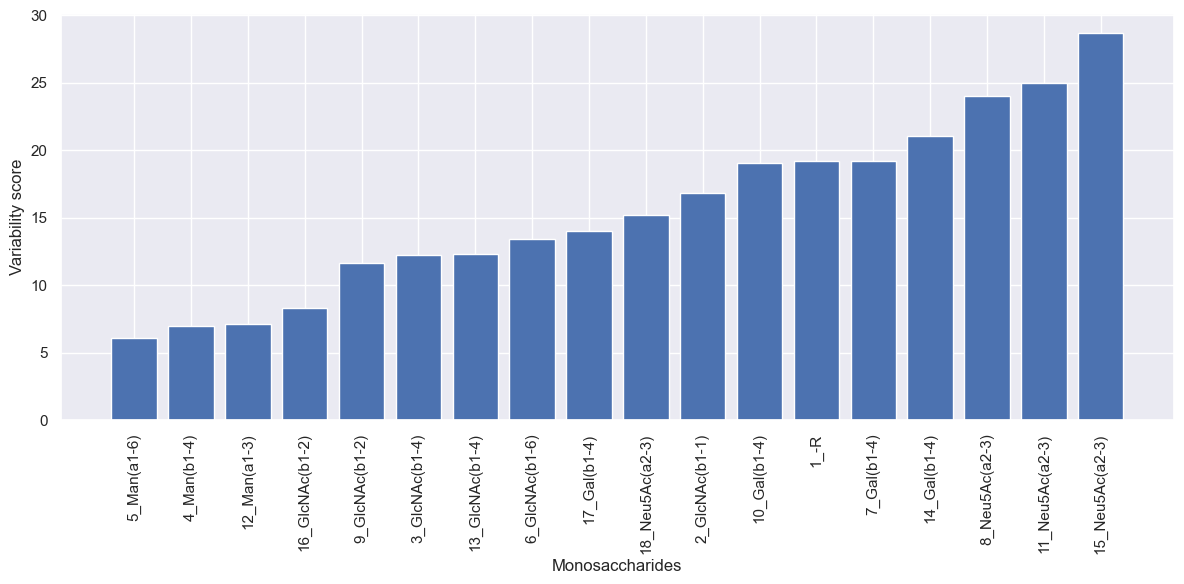

In [76]:
plot_monosaccharide_instability(glycan, mode='mean')